# Trading Strategies powered by Machine Learning - Regression

## Linear Regression with scikit-learn - a simple Introduction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
budget = np.array([5, 10, 17, 27, 35, 40, 42, 49, 54, 60])

In [ ]:
revenue = np.array([2.6, 19. , 23.8, 26.9, 41.1, 58.3, 40.3, 58.7, 73.1, 69.7])

In [ ]:
df = pd.DataFrame(data = {"revenue":revenue, "budget":budget})
df

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.show()

__Linear Relationship between Budget and Revenue__:

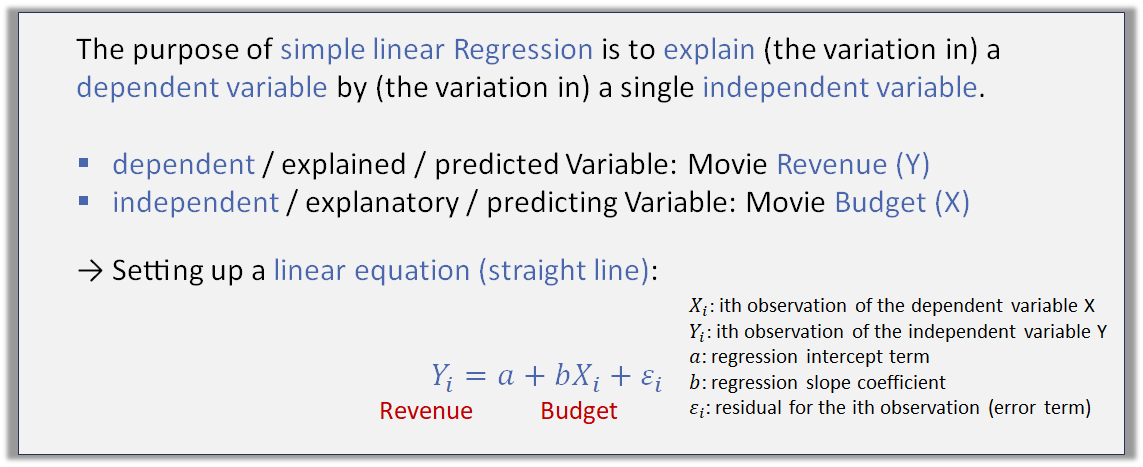

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression(fit_intercept = True)

In [ ]:
lm.fit(X = df.budget.to_frame(), y = df.revenue) # fitting the model (Regression Line)

In [ ]:
slope = lm.coef_ # slope of Regression Line
slope

In [ ]:
intercept = lm.intercept_ # intercept of Regression Line
intercept

In [ ]:
df["pred"] = lm.predict(df.budget.to_frame())
df

In [ ]:
x_lin = np.array([0, 100])
y_lin = intercept + slope * x_lin

In [ ]:
y_lin

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Making Predictions with Linear Regression

__new movies (observations/data points)__

In [ ]:
budget_new = np.array([63, 66, 74, 80, 85]) 

In [ ]:
revenue_new = np.array([74.2,  80.7, 98.2,  94.8, 101.7]) 

In [ ]:
df_new = pd.DataFrame(data = {"revenue":revenue_new, "budget":budget_new})
df_new

In [ ]:
df_new["pred"] = lm.predict(df_new.budget.to_frame())
df_new

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Regression Line")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Overfitting

__Overfitting__: Model performs well on the original (training) dataset, but it does not generalize well to new data (test set).
Overfitting happens when the __model is too complex__ (too many parameters) and detects subtle patterns (noise) in the training set. 

Example: __Polynomial Model__ with degree = 9 (perfect fit)

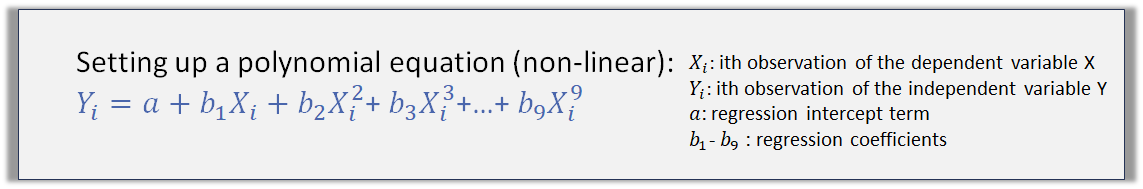

In [ ]:
poly_m = np.polyfit(x = df.budget, y = df.revenue, deg = 9) # polynomial regression (deg = 9)

In [ ]:
poly_m # 10 regression parameters (intercept + 9 regression coefficients)

In [ ]:
x_poly = np.linspace(0, 100, 1000) # x values for polynomial regression line/curve

In [ ]:
y_poly = np.polyval(poly_m, x_poly) # y values for polynomial regression line/curve

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome overfitting:

- use a __simpler model__ with fewer parameters (linear rather than polynomial)<br>
- more and better data (remove outliers & errors) <br>
- constrain the model -> make the model more simple with __Regularization__

##  Underfitting

__Underfitting__: Model performs neither well on the original (training) dataset, nor does it generalize well to new data (test set).
Underfitting happens when the __model is too simple__ to learn the underlying structure of the data.

most simple (linear) model with only one paramter: __y = a__ <br>
intercept == a (e.g. the mean)<br>
slope == 0 

In [ ]:
mean = df.revenue.mean()
mean

In [ ]:
plt.figure( figsize = (12, 8))
plt.scatter(x = df.budget, y = df.revenue, s = 50, label = "Data")
plt.plot(x_lin, y_lin, c = "red", label = "Linear Regression Line")
plt.plot(x_poly, y_poly, label = "Polynomial Regression | deg = 9 (Overfit)",linestyle = "--", color = "red")
plt.hlines(y = mean, xmin = 0, xmax = 100, linestyle = "-.", color = "darkred", label = "Underfit")
plt.scatter(x = df_new.budget, y = df_new.revenue, s = 50, label = "New Data")
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
plt.legend(fontsize = 11, loc = 4)
plt.ylim(0, 150)
plt.show()

__Solutions__ to overcome underfitting:

- use a __more powerful model__ with more parameters<br>
- add more/better features (independent variables) to the algorithm -> Feature Engineering <br>
- reduce the constraints of the model -> make it more complex with __less Regularization__

## Getting the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.plot(figsize = (12, 8))
plt.show()

In [ ]:
data.loc["2019-06"].plot(figsize = (12, 8))
plt.show()

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data

## A simple Linear Model to predict Financial Returns (Part 1)

Correct: Predicting __Returns__ <br>
Wrong: Predicting __Prices__

In [ ]:
data

In [ ]:
data["lag1"] = data.returns.shift(1)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.iloc[:, -2:].plot(kind = "scatter", x = "lag1", y = "returns")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

## A simple Linear Model to predict Financial Returns (Part 2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression(fit_intercept = True)

In [ ]:
lm.fit(data.lag1.to_frame(), data.returns)

In [ ]:
slope = lm.coef_
slope

In [ ]:
intercept = lm.intercept_
intercept

In [ ]:
data["pred"] = lm.predict(data.lag1.to_frame())

In [ ]:
data

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Lag1 Returns", fontsize = 13)
plt.ylabel("Returns", fontsize = 13)
plt.show()

In [ ]:
data

In [ ]:
data[["returns", "pred"]].plot(figsize = (12, 8))
plt.show() # model fails to predict the magnitude of returns

In [ ]:
data.pred = np.sign(data.pred) # maybe the model can predict the market direction (-1 / +1)

In [ ]:
data

In [ ]:
np.sign(data.returns * data.pred)

In [ ]:
hits = np.sign(data.returns * data.pred).value_counts()

In [ ]:
hits

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # percentage of correctly forecasted market directions 

## A Multiple Regression Model to predict Financial Returns

__Adding more Features - a multiple Regression Model__

In [ ]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [ ]:
data.info()

In [ ]:
data.dropna(inplace = True)

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
cols

In [ ]:
lm = LinearRegression(fit_intercept = True)

In [ ]:
lm.fit(data[cols], data.returns)

In [ ]:
lm.coef_

In [ ]:
lm.intercept_

In [ ]:
data["pred"] = lm.predict(data[cols].values)

In [ ]:
data.pred = np.sign(data.pred)

In [ ]:
data

In [ ]:
data.pred.value_counts()

In [ ]:
hits = np.sign(data.returns * data.pred).value_counts()

In [ ]:
hits

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

## In-Sample Backtesting and the Look-ahead-bias

In [ ]:
data

In [ ]:
data["strategy"] = data.pred * data.returns

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

## Out-Sample Forward Testing

In [ ]:
data = pd.read_csv("test_set.csv", parse_dates = ["time"], index_col = "time")

In [ ]:
data

In [ ]:
data["returns"] = np.log(data.div(data.shift(1)))

In [ ]:
data

In [ ]:
lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data["pred"] = lm.predict(data[cols].values)

In [ ]:
data

In [ ]:
data.pred = np.sign(data.pred)

In [ ]:
data.pred.value_counts()

In [ ]:
hits = np.sign(data.returns * data.pred).value_counts()

In [ ]:
hits

In [ ]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

In [ ]:
data["strategy"] = data.pred * data.returns

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data["trades"] = data.pred.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()